# Differentially rotating a coordinate

- https://docs.sunpy.org/en/stable/generated/gallery/differential_rotation/differentially_rotated_coordinate.html

How to differentially rotate a coordinate.

The example uses the `sunpy.coordinates.metaframes.RotatedSunFrame` coordinate
metaframe in `sunpy.coordinates` to apply differential rotation to a
coordinate.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import astropy.units as u
from astropy.coordinates import SkyCoord

import sunpy.map
from sunpy.coordinates import RotatedSunFrame
from sunpy.data.sample import AIA_171_IMAGE

First, load an AIA observation and define a coordinate in its coordinate
frame (here, helioprojective Cartesian).  The appropriate rate of rotation
is determined from the heliographic latitude of the coordinate.

In [ ]:
aiamap = sunpy.map.Map(AIA_171_IMAGE)
point = SkyCoord(187*u.arcsec, 283*u.arcsec, frame=aiamap.coordinate_frame)

We can differentially rotate this coordinate by using
`sunpy.coordinates.metaframes.RotatedSunFrame` with an array of observation
times.  Let's define a daily cadence for +/- five days.

In [ ]:
durations = np.concatenate([range(-5, 0), range(1, 6)]) * u.day
diffrot_point = SkyCoord(RotatedSunFrame(base=point, duration=durations))

To see what this coordinate looks like in "real" helioprojective
Cartesian coordinates, we can transform it back to the original frame.
Since these coordinates are represented in the original frame, they will not
account for the changing position of the observer over this same time range.

In [ ]:
diffrot_point

<SkyCoord (RotatedSunHelioprojective: base=<Helioprojective Frame (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>)>, duration=[-5. -4. -3. -2. -1.  1.  2.  3.  4.  5.] d, rotation_model=howard): (Tx, Ty) in arcsec
    [(187., 283.), (187., 283.), (187., 283.), (187., 283.), (187., 283.),
     (187., 283.), (187., 283.), (187., 283.), (187., 283.), (187., 283.)]>

In [ ]:
transformed_diffrot_point = diffrot_point.transform_to(aiamap.coordinate_frame)
transformed_diffrot_point

<SkyCoord (Helioprojective: obstime=2011-06-07T06:33:02.880, rsun=696000.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2011-06-07T06:33:02.880, rsun=696000.0 km): (lon, lat, radius) in (deg, deg, m)
    (-0.00406429, 0.04787238, 1.51846026e+11)>): (Tx, Ty, distance) in (arcsec, arcsec, m)
    [(-772.69378072, 282.77545584, 1.51502020e+11),
     (-635.25851451, 282.86951972, 1.51373625e+11),
     (-459.07089956, 282.9428274 , 1.51273829e+11),
     (-254.82447782, 282.99074318, 1.51208725e+11),
     ( -34.98324566, 283.01021568, 1.51182296e+11),
     ( 397.53637817, 282.96074958, 1.51249466e+11),
     ( 583.76348605, 282.89496793, 1.51338955e+11),
     ( 734.3555842 , 282.80682531, 1.51459158e+11),
     ( 840.22448988, 282.70185963, 1.51602747e+11),
     ( 895.06498643, 282.58659113, 1.51760989e+11)]>

Let's plot the original coordinate and the differentially rotated
coordinates on top of the AIA observation.

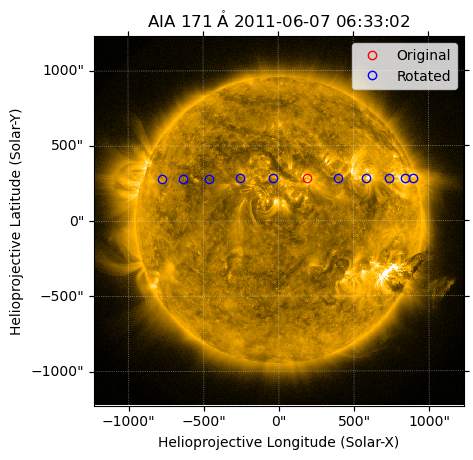

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection=aiamap)
aiamap.plot(axes=ax, clip_interval=(1., 99.95)*u.percent)

ax.plot_coord(point, 'ro', fillstyle='none', label='Original')
ax.plot_coord(transformed_diffrot_point, 'bo', fillstyle='none',
              label='Rotated')
ax.legend()

plt.show()